In [1]:
# Task 3: Customer Churn Prediction (Bank Customers)

In [4]:
pip install pandas seaborn matplotlib scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
# Display settings
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)

In [6]:
# Dataset Overview
dataframe = pd.read_csv('Churn Modeling.csv')
dataframe.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
# Understanding Dataset Structure
print("Shape of dataset:", dataframe.shape)
print("\nMissing values:\n", dataframe.isnull().sum())
dataframe.info()
dataframe.describe()

Shape of dataset: (10000, 14)

Missing values:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
# Data Cleaning and Preparation

In [10]:
# Drop unnecessary columns
dataframe.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [11]:
# Encode 'Gender' using Label Encoding
le = LabelEncoder()
dataframe['Gender'] = le.fit_transform(dataframe['Gender'])  # Male=1, Female=0

In [12]:
# One-hot encode 'Geography'
dataframe = pd.get_dummies(dataframe, columns=['Geography'], drop_first=True)

In [13]:
# Define features and target
X = dataframe.drop('Exited', axis=1)
y = dataframe['Exited']

In [14]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
# Exploratory Data Analysis (EDA)

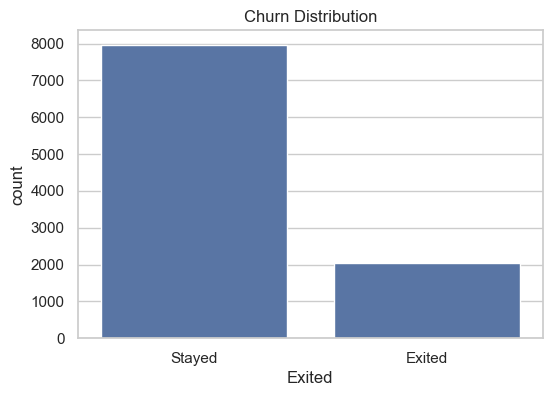

In [16]:
# Churn distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Exited', data=dataframe)
plt.title('Churn Distribution')
plt.xticks([0,1], ['Stayed', 'Exited'])
plt.show()

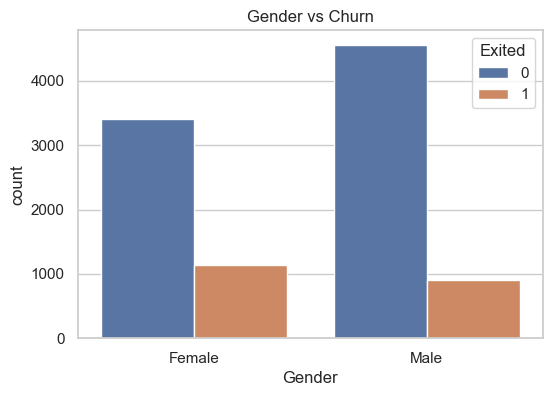

In [17]:
# Gender vs Churn
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', hue='Exited', data=dataframe)
plt.title('Gender vs Churn')
plt.xticks([0,1], ['Female', 'Male'])
plt.show()

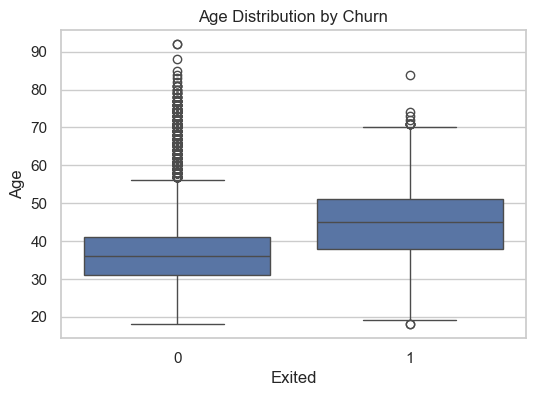

In [18]:
# Age Distribution by Churn
plt.figure(figsize=(6,4))
sns.boxplot(x='Exited', y='Age', data=dataframe)
plt.title('Age Distribution by Churn')
plt.show()

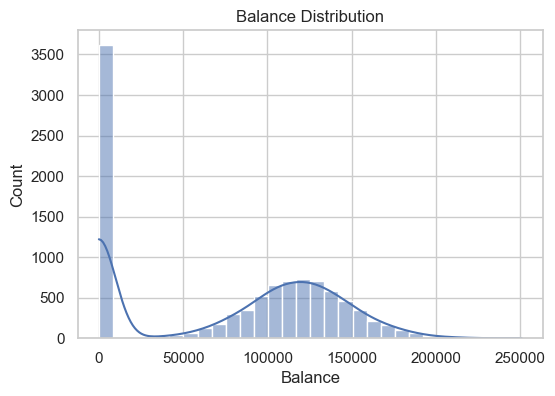

In [19]:
# Balance Distribution
plt.figure(figsize=(6,4))
sns.histplot(dataframe['Balance'], bins=30, kde=True)
plt.title('Balance Distribution')
plt.show()

In [20]:
# Model Training

In [21]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [22]:
# Train Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
# Predictions
y_pred = model.predict(X_test)

In [24]:
# Evaluation Metrics
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.866

Confusion Matrix:
 [[1552   55]
 [ 213  180]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.46      0.57       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [25]:
# Feature Importance Analysis
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

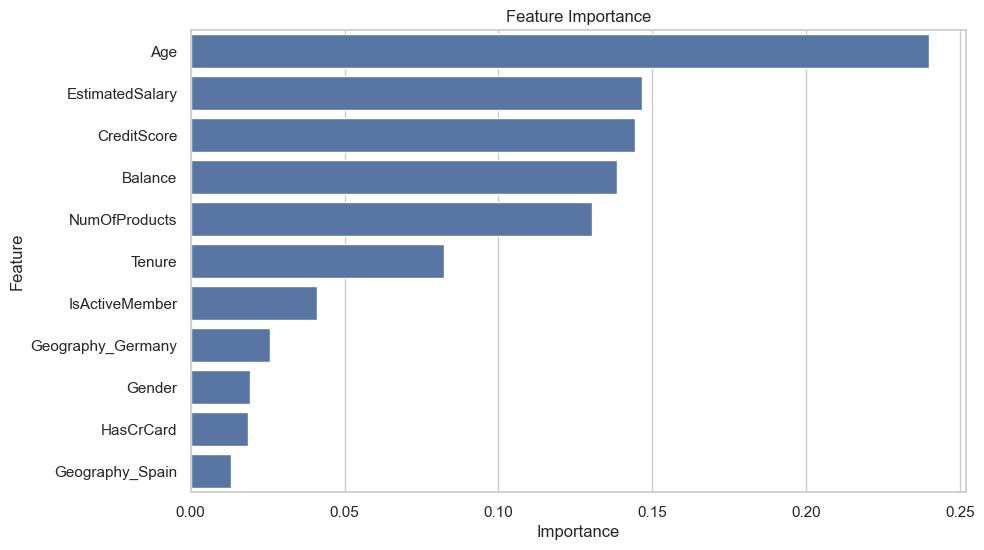

In [26]:
# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

In [ ]:
# Conclusion
# The model achieved reasonable accuracy in predicting customer churn.
# Key features influencing churn were: Age, Balance, Number of Products, and Tenure.
# Business actions can focus on retaining high-risk customers based on these insights.